### Chapter 6.3
# GEOM(1)/GI/1 Waiting Time Distribution
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

The arriving customer stream is modeled by a Bernoulli process with Parameter 
$p=(1-\alpha)$, i.e. at each point on the discrete time line an arrival occurs with probability $p=(1-\alpha)$. Hence, the interarrival time $A$ is GEOM(1) distributed:

$ \displaystyle a(k) = (1-p)^{k-1} \cdot p = \alpha^{k-1} \cdot (1-\alpha) \;, \quad k = 1,2,\ldots, $
with $  \displaystyle  E[A] =   \frac{1}{p} = \frac{1}{1-\alpha} \;,$

The stability condition must be fulfilled, i.e. 

$\rho = E[B]/E[A]<1$.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from discreteTimeAnalysis import *
import math

EA = 5.0
alpha = 1-1/EA
A = GEOM(EA, m=1) # GEOM_0 with EA 

B = DU(1,7)

rho = B.mean()/A.mean()
print(f'System utilizatiohn: rho={rho:.2f}')

System utilizatiohn: rho=0.80


## Z-Transform of Waiting Time 
The Z-transform of the waiting time distribution in GEOM(1)/GI/1 system is obtained: 

$ \displaystyle W_{ZT} (z)  = \frac{(1-\rho) \cdot (1-z)}
              {1-\alpha z -  (1 - \alpha) \; z \; B_{ZT} (z)} \;.
$              

This can be seen as the discrete-time form of the Pollaczek-Khintchine formula.

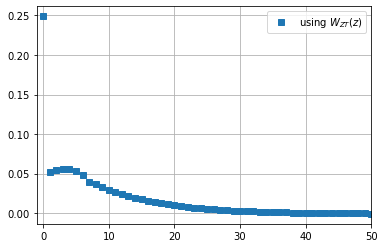

In [9]:
def ztransform(A):
    def zt(z):        
        return np.sum(A.pk*(z**(-A.xk)))    
    return zt

B_zt = ztransform(B) # We have now the Z-transform: B_zt(z)

# Z-transform of the waiting time: W_zt(z)
W_zt = lambda z: (1-rho)*(1-z)/(1-alpha*z-(1-alpha)*z*B_zt(z))

# We use the inverse DFT to obtain the PMF
xmax = 1000
n = np.arange(xmax)
z = np.exp(n*complex(0,1)*2*math.pi/xmax) # evalute the function at the right places
y = np.vectorize(W_zt)(z)

iz = np.fft.ifft(y) # inverse DFT

plt.plot(iz.real, 's', label='using $W_{ZT}(z)$' )
plt.grid(which='major')
plt.xlim([-1, 50])
plt.legend();

## Waiting Time Distribution: Power Method
By means of the power method, we iteratively compute the waiting time distribution, until the distribution $W$ reaches the steady state.

$ \displaystyle
  w_{n+1} (k) = \pi_0 \Big(w_n (k)  * b_n (k) * a_n (-k)\Big)
          =  \pi_0 \Big(w_n (k) * c_n (k)\Big)
$

The waiting time distribution of the $(n+1)$-st customer can be successively calculated from the waiting time distribution of the $n$-th customer. The interarrival and service time distributions can be chosen in a customer-dependent manner.
This leads to an iterative algorithm for calculating the waiting time distribution of the GI/GI/1 system in time domain. 

This can be expressed in terms of random variables:

$ \displaystyle
W_{n+1} = \max(W_n+C,0) \quad \text{with } \; C = B-A
$

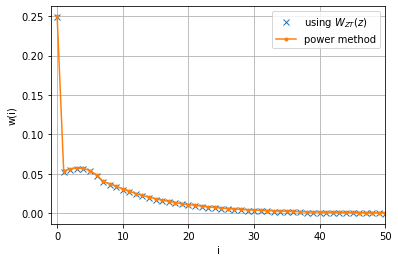

In [11]:
C = B-A

Wn1 = DET(0) # empty system
Wn = DET(1)  # just for initialization

# power method
while Wn != Wn1: # comparison based on means of the distributions
    Wn = Wn1
    Wn1 = max( Wn+C ,0)
    

plt.figure(2, clear=True)
plt.plot(iz.real, 'x', label='using $W_{ZT}(z)$' )
Wn1.plotPMF(label='power method')
plt.grid(which='major')
plt.xlim([-1, 50])
plt.xlabel('i')
plt.ylabel('w(i)')
plt.legend()